<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL-project on Movies relational database
---

A relational database, also called Relational Database Management System (RDBMS) or SQL database, stores data in tables and rows also referred to as records. The most popular relational databases have been Microsoft SQL Server, Oracle Database, MySQL and IBM DB2. A relational database works by linking information from multiple tables through the use of “keys.” A key is a unique identifier which can be assigned to a row of data contained within a table.  The connection between the various keys between tables then creates the  “relationship” between records contained across multiple tables. The primary benefit of the relational database approach is the ability to create meaningful information by joining the tables.

SQL or Structured Query Languange is used to communicate with a database. SQL statements are used to perform tasks such as update data on a database, or retrieve data from a database.

##Using SQL in Python
In this project I will use Python SQL library for mysql.connector to 

* connect to the IMDb movies database and run the queries.
* reading data from across the tables in the movies database into one table that can be analysed with statistical tools in pandas.
* Do a few useful analyses and visualisation with the movies dataframe in pandas.


##SQL Libraries in Python

There are a number of varieties of SQL (Oracle SQL, mySQL, postgreSQL, etc) databases. Each has slight differences in the language used to interrogate databases.

One of the python SQL libraries, mysql.connector, will be used for this particular project.

Install the mysql.connector library.

In [3]:
# colab does not have mysql automatically installed, so you must run this code once to install it each time you reopen the colab document
!pip install mysql.connector

     |████████████████████████████████| 11.9 MB 15.9 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=c94adec372b48920665c4af4f5310bab856e41175979bc71be7d12d3416bab2d
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector


##About the Data
---
IMDb (Internet Movie Database) is one of the most recognized names for its comprehensive online database collection of movies, films, TV series and so on. As of today (July 2020), you’ll see through the following data pull that IMDb database has approximately 7 million titles. IMDb has made essential susbsets of its database available for non-commercial use of the public. For this project, we will be using the IMDb dataset from Imdb_ijs (by Janez Kranjc).

https://relational.fit.cvut.cz/dataset/IMDb

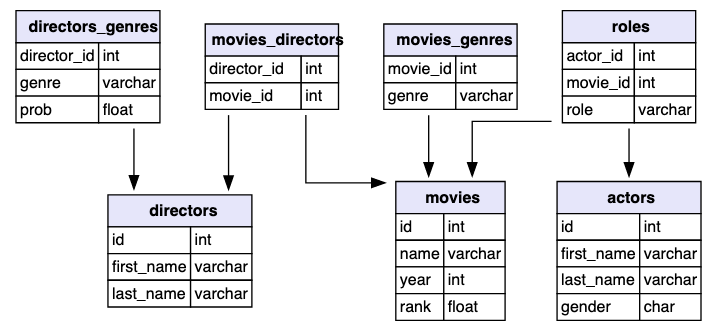

Before loading the dataset into pandas or use the functions of the mysql.connector let's import mysql.connector.

In [4]:
import mysql.connector

##Reading SQL database into python
---
1. Load in the IMDB database using the location of the database which is as follows:
```
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"
  ```

In [5]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

# add a function below here to execute a query (see above for code)
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None

Now that we have the tables, let's

* Run a query to get a count of rows
* Show the tables in the database
* Print the number of records in each of the tables

To make sure that the dataset is not empty!

In [6]:
def count_query(table_name):
  query3 = "SELECT COUNT(*) FROM " +table_name
  result = execute_query(query3)[0][0]
  return result

# run a query using the execute query function
query = "SHOW TABLES"
tables_imdb = execute_query(query)
print(tables_imdb)
for x in tables_imdb:
  table_name = x[:][0]
  tot_count = count_query(table_name)
  print("The number of records in ", table_name, " is ", tot_count)

[('actors',), ('directors',), ('directors_genres',), ('movies',), ('movies_directors',), ('movies_genres',), ('roles',)]
The number of records in  actors  is  817718
The number of records in  directors  is  86880
The number of records in  directors_genres  is  156562
The number of records in  movies  is  388269
The number of records in  movies_directors  is  371180
The number of records in  movies_genres  is  395119
The number of records in  roles  is  3431966


##Read the movies dataset using an SQL query into a pandas dataframe 
---
To read SQL query into a pandas dataframe we can use pd.read_sql_query(), giving it the query and the database.


Before we can use SQL query to get the dataset into pandas dataframe, we will need to import pandas. We also will need import files from google.colab so we can download the dataframe into csv file for future use.

In [7]:
import pandas as pd
from google.colab import files

Let's use read.sql_query now and download the dataset as movies.csv to be used later. 

In [8]:
def get_movies_data():
  query = """
    SELECT first_name, last_name, name, year, rank, genre 
    FROM directors, movies, movies_genres, movies_directors 
    WHERE movies.id = movies_directors.movie_id 
    AND movies.id = movies_genres.movie_id 
    AND directors.id = movies_directors.director_id
  """
  df = pd.read_sql_query(query, mydb)
  df. to_csv('movies.csv')
  files.download('movies.csv')
  return df

Let's check to see if movies_df can be successfully downloaded.

In [9]:
# This code will test if movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test passed, variable is a pandas dataframe


## Inspect the dataset 
---
First let's look at what the dataframe looks like. Let's upload the movies.csv file- a copy of which is saved in https://github.com/JaySanthanam/Programming-for-data/tree/main/Datasets

We will then inspect the dataset 

In [10]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt
import seaborn as sns

def get_data():
  !rm movies.csv
  # upload a set of chosen files then read a specified file
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
  return df 

mov_data = get_data()


Saving movies.csv to movies.csv


Get some simple stats

In [11]:
print(mov_data.describe())

          Unnamed: 0           year           rank
count  368894.000000  368894.000000  113376.000000
mean   184446.500000    1969.442222       5.995124
std    106490.669438      29.082051       1.540330
min         0.000000    1888.000000       1.000000
25%     92223.250000    1947.000000       5.100000
50%    184446.500000    1976.000000       6.200000
75%    276669.750000    1996.000000       7.100000
max    368893.000000    2007.000000       9.900000


Technical summary

In [12]:
print(mov_data.info()) # get technical summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
None


### Clean, format and sort the dataset 
---
Looks like we have some null values. What about duplicates? Let's check for those and drop any duplicate entries.

In [55]:
mov_df = mov_data.drop_duplicates()
print(mov_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.5+ MB
None


Only the rank column has null values. Let's drop all null values but rename the dataframe so that we can always get access to the original dataframe when we need to work with columns other than rank. The new dataframe is mov_df_rank. This mov_df_rank dataframe will be used whenever we need to explore movie rankings. Otherwise, we will continue using mov_df for our analyses so we do not lose any information unneccesarily. 

In [56]:
mov_df_rank = mov_df.dropna()
print(mov_df_rank.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       113376 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.9+ MB
None


The director names are separated as first and last names. So let's modify the dataframe to join their first and last name to one column - director_name

In [57]:
mov_df['director_name'] = mov_df['first_name']+' ' + mov_df['last_name']
mov_df =mov_df.drop(columns=['first_name', 'last_name'])

Check to see if this worked.

In [58]:
print(mov_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 0 to 368893
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     368894 non-null  int64  
 1   name           368894 non-null  object 
 2   year           368894 non-null  int64  
 3   rank           113376 non-null  float64
 4   genre          368894 non-null  object 
 5   director_name  368894 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 19.7+ MB
None


Now we have a dataframe with no null values and let's look at bi-variate scatter plot. But, this time, the plot is not for looking at correlation between variables (in this case the columns). We are rather going to use it get an idea of the number of movies by the genre and titles released by year. 

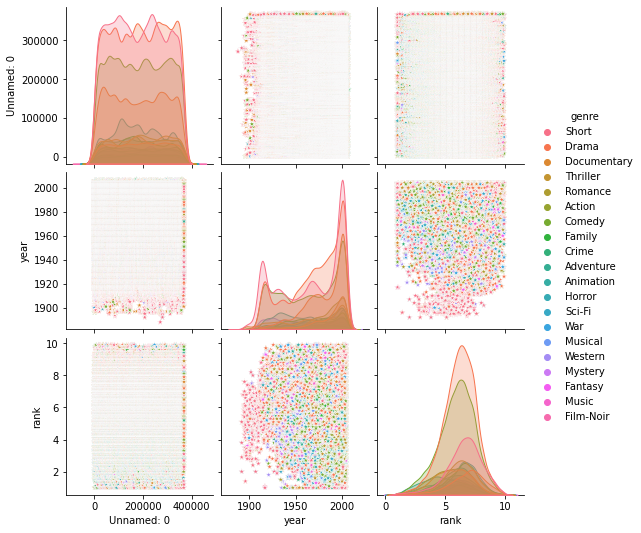

In [42]:
sns.set_palette('husl',8) # got this from https://seaborn.pydata.org/tutorial/color_palettes.html

bi_var_plot = sns.pairplot(mov_df,hue="genre",diag_kind="kde", markers='*'); #Using markers and pair plotting from https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.set_style("darkgrid")
plt.show()

### Movie Details
---
One of the things that most people would be interested in is finding out all the details of a movie by it's title. For example, who is the director of the movie "Kill Bill" and it's genre, rating and year of release. Below is a function that retrieves such an information based on movie name.

In [59]:
def get_movie_details(df, title):
  exists = mov_df['name'].str.contains(title).any()
  if exists == False:
    print("Movie title not found")
    return 0
  elif exists == True:
    df = df.set_index('name')
    result = df.loc[title]
    print("Details of the movie", title)
    print(result)
    return 0
  else:
    return 99


actual = get_movie_details(mov_df,"Nudo e selvaggio")
#Test if the function works well for any title
print("\n\nTesting the movie detail function")
expected = 0
if actual == expected:
  print("Function works well")
else:
  print("Expected", expected, "but got", actual)


Details of the movie Nudo e selvaggio
                  Unnamed: 0  year  rank      genre              director_name
name                                                                          
Nudo e selvaggio      328544  1985   5.0     Action  Michele Massimo Tarantini
Nudo e selvaggio      328545  1985   5.0  Adventure  Michele Massimo Tarantini


Testing the movie detail function
Function works well


### Movies by specific director

In [64]:
def get_director_movies(df,dir_name):
  movies_list = df[df['director_name']== dir_name]
  return movies_list

movies = get_director_movies(mov_df,"Quentin Tarantino")
movies_list = movies["name"]
print(movies_list)


328559                   Four Rooms
328560                   Four Rooms
328561          Inglorious Bastards
328562          Inglorious Bastards
328563          Inglorious Bastards
328564                 Jackie Brown
328565                 Jackie Brown
328566                 Jackie Brown
328567            Kill Bill: Vol. 1
328568            Kill Bill: Vol. 1
328569            Kill Bill: Vol. 1
328570            Kill Bill: Vol. 2
328571            Kill Bill: Vol. 2
328572            Kill Bill: Vol. 2
328573            Kill Bill: Vol. 2
328574    My Best Friend's Birthday
328575    My Best Friend's Birthday
328576                 Pulp Fiction
328577                 Pulp Fiction
328578               Reservoir Dogs
328579               Reservoir Dogs
328580               Reservoir Dogs
328581               Reservoir Dogs
Name: name, dtype: object


### Movies released on specific year

In [77]:
def get_year_movies(df,year):
  movies_list = df[df['year']== year]
  return movies_list

year = int(input("Choose a year between 1888 to 2007: "))
if year<2008 and year>1887:
  movies_by_year = get_year_movies(mov_df,year)
  year_count = movies_by_year['year'].count()
  movies_year_list = movies_by_year["name"]
  print("\n\nThere were", year_count, "movies released in the year", year, "and they are:\n\n")
  print(movies_year_list)
else:
  print("Invalid year")

Choose a year between 1888 to 2007: 1963


There were 3346 movies released in the year 1963 and they are:


213                     Teen Ghaaranay
791       Me, bebia, Iliko da Ilarioni
792       Me, bebia, Iliko da Ilarioni
868                          Ricochets
869                          Ricochets
                      ...             
368824                   Bire on vardi
368868                Yavas gel gzelim
368869                Yavas gel gzelim
368876                       apkin kiz
368877                       apkin kiz
Name: name, Length: 3346, dtype: object


We could write a function to find list of movies of specific genre, but, that will be a long list. Instead it will be useful to look at each column.

### Explore each column of the dataframe
---
Starting with movie genre coulumn,

1. What are the different movie genres?
2. Which genre of movies is most liked by people (ranked higher)?

#### 1. What are the different movie genres?

In [43]:
genres = mov_df['genre'].value_counts()
print(genres)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


Let's visualise the above result using seaborn.

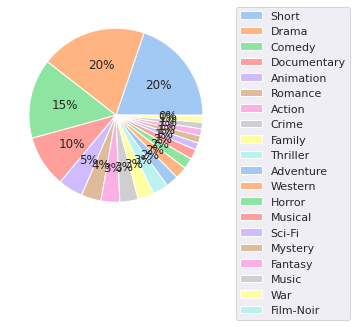

In [44]:
def do_pie_plot(x,y):
  sns.set(style="darkgrid")
  colors = sns.color_palette('pastel')
  plt.pie(y, colors =colors, autopct='%.0f%%')
  plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  return

x = genres.keys()
y = genres
do_pie_plot(x,y)

Clearly, the most number of movies are from the genres short and drama followed by comedy.

#### 2.Which genre/s has higher rank than the rest? 

In [45]:
rank_by_genre = mov_df_rank.groupby('genre')['rank'].mean()
print(rank_by_genre)

genre
Action         5.365895
Adventure      5.619379
Animation      6.553628
Comedy         5.923196
Crime          5.861007
Documentary    6.659544
Drama          6.146169
Family         6.323344
Fantasy        5.882289
Film-Noir      6.702892
Horror         4.738325
Music          6.458921
Musical        6.109916
Mystery        5.941501
Romance        6.171457
Sci-Fi         5.015858
Short          6.533778
Thriller       5.522776
War            6.430539
Western        5.665567
Name: rank, dtype: float64


Let's use a bar chart to visualise this.

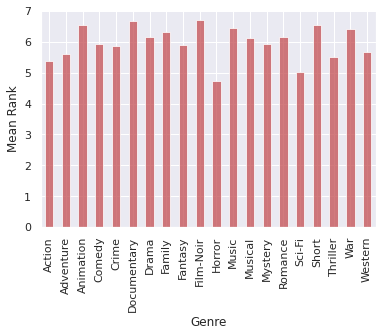

In [46]:
def do_bar_plot(x,y):
  bar_plot = y.plot(x=x, y=y, kind="bar", alpha=0.75, rot=90, color = 'r')
  bar_plot.set_xlabel("Genre")
  bar_plot.set_ylabel("Mean Rank")
  plt.show()
  return 

x = rank_by_genre.keys()
y = rank_by_genre
do_bar_plot(x,y)

The average rank by genre is pretty even, with the top 5 genres in ranking:
  * animation
  * documentary 
  * Film-noir
  * short films 
  * war

### Movie rank
---
Let's explore the rank column next.
1. How many movies have ranks of over 9?
2. What is the average/mean rank for each year?
  * Has it been increasing or decreasing over the years
3. What is the median rank for each year 
  * How does this compare to the mean each year?

Many movie names are repeated by genre. So, it makes sense to remove duplicates in name so there are no double counting in ranks.

In [79]:
mov_no_dup = mov_df_rank.drop_duplicates('name')

###1. How many movies have ranks over 9?

In [80]:
high_rank = mov_no_dup[mov_no_dup['rank'] > 9.0].count()
high_rank[0]

806

###2. Mean Rank for each year 

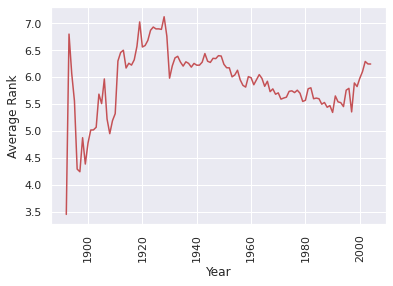

In [100]:
def do_line_plot(y, x_label,y_label):
  line_plot = y.plot(x="year", y=y, kind="line", alpha=0.98, rot=90, color = 'r')
  line_plot.set(xlabel=x_label, ylabel=y_label)
  plt.show()
  return

rank_mean_year = mov_no_dup.groupby('year')['rank'].mean()
do_line_plot(rank_mean_year,"Year","Average Rank")

###3. Median rank for each year

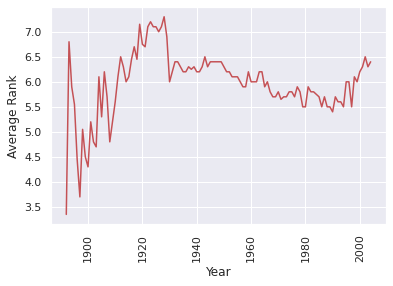

In [101]:
rank_median_year = mov_no_dup.groupby('year')['rank'].median()
do_line_plot(rank_median_year,"Year","Average Rank")

#### How does median compare to the mean each year?

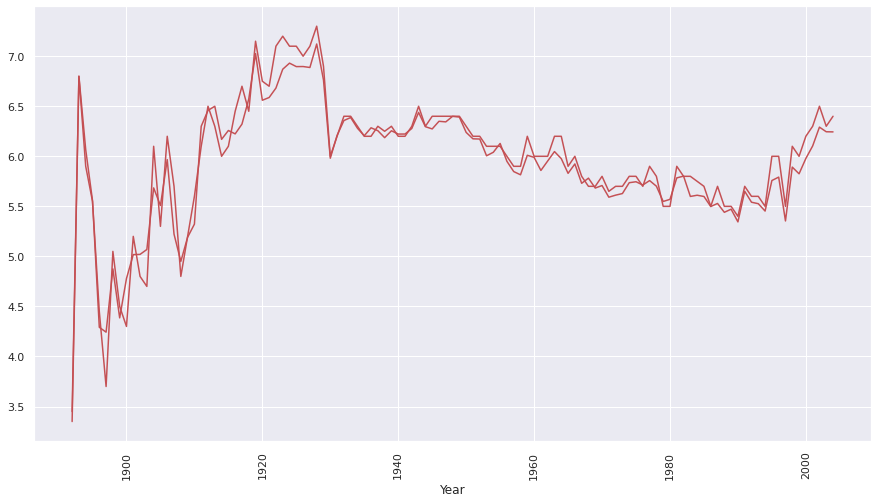

In [103]:
def do_line_plot(y1,y2, x_label):
  plt.figure(figsize = (15,8))
  line_plot = y1.plot(x="year", y=y1, kind="line", alpha=0.98, rot=90, color = 'r')
  line_plot.set(xlabel=x_label)
  line_plot = y2.plot(x="year", y=y2, kind="line", alpha=0.98, rot=90, color = 'r')
  line_plot.set(xlabel=x_label)
  plt.show()
  return

do_line_plot(rank_mean_year,rank_median_year, "Year")

From the above plot, we can see the years when there are more movies with high rating compared to lower ratings.

### Movies and release year
---
Next let's look at total number of movies in a year group
1.  Latest and oldest movies - movies after and before a certain release year.

  1.1 e.g. before 2000 

  1.2 e.g. In 2000 or after 

2.  List of Movies by specific director.
3.  Plot the total number of movies released by year.

###Task 1.1: Oldest movies - movies released before 2000

Find movies released before a specific year - here 2000.

In [109]:
def get_oldies_number(year):
  oldies = mov_no_dup[mov_no_dup['year']< year].count()
  return oldies[0]

year = int(input("Enter a cut-off year: "))
if year < 2007:
  oldies_number = get_oldies_number(year)
  print("The total number of movies released before", year, "is", oldies_number)
else:
  print("Enter a year before 2007")

Enter a cut-off year: 2000
The total number of movies released before 2000 is 46170


###Task 1.2: Newer movies - movies released in or after 2000

In [112]:
def get_new_number(year):
  new_mov = mov_no_dup[mov_no_dup['year']>= year].count()
  return new_mov[0]

year = int(input("Enter a cut-off year: "))
if year > 1888:
  new_number = get_new_number(year)
  print("The total number of movies released after or in the", year, "is", new_number)
else:
  print("Enter a year after 1888")


Enter a cut-off year: 2000
The total number of movies released after or in the 2000 is 9784


###Task 3: Total number of movies by year:

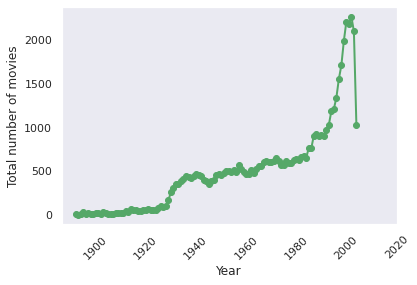

In [ ]:
import matplotlib.ticker as ticker
df_no_dup = mov_df_rank.drop_duplicates('name')
movie_by_year = df_no_dup.groupby('year')["name"].count()
year = np.array(movie_by_year.keys())
movie_year = np.array(list(movie_by_year))
plt.plot(year, movie_year, 'go-', linewidth =2)
plt.xlabel("Year")
plt.ylabel("Total number of movies")
plt.xticks(year)
plt.xticks([1900, 1920, 1940, 1960, 1980, 2000, 2020], rotation=45)
plt.grid()
plt.show()
#line_plot = movie_by_year.plot(x="year", y=movie_by_year, kind="line", alpha=0.75, rot=90, color = 'r')
#line_plot.set(xlabel="Year", ylabel="Total number of movies")
#plt.show()

###Task 4: Find top 10 highly ranked directors based on genre:

I will be keeping the strategy to find highly ranked directors the same, i.e., he/she should have directed more than 1 movie and their median rank should be larger than their average rank.

In [ ]:
def find_top(df, genre):
  df = df.loc[df['genre'] == genre]
  dir_rank = df.groupby(['dir_name'])['rank'].max()
  dir_ave = df.groupby(['dir_name'])['rank'].mean()
  dir_med = df.groupby(['dir_name'])['rank'].median()
  dir_count = df.groupby(['dir_name'])['rank'].count()
  index  = dir_rank.keys()
  rank = list(dir_rank)
  ave = list(dir_ave)
  median = list(dir_med)
  count = list(dir_count)
  d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
  top_dir = pd.DataFrame(data=d)
  return top_dir

dir_top = find_top(dir_df,'Animation')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Animation movie directors are:")
print(top_10)

Top 10 Animation movie directors are:
            dir_name  max_rank  mean_rank  median_rank  count
278     Friz Freleng       8.4   6.718800         6.80    250
151  Chuck (I) Jones       9.0   6.941423         7.00    239
187   Dave Fleischer       9.5   5.954378         5.80    217
733  Robert McKimson       8.3   6.460234         6.50    171
820        Tex Avery       8.9   7.027559         6.90    127
443   Joseph Barbera       8.8   6.513115         6.60    122
732  Robert Clampett       9.1   7.210256         7.20     78
372  Jack (I) Hannah       9.0   6.943750         6.95     64
375      Jack Kinney       8.7   6.518966         6.45     58
373    Jack (I) King       8.7   7.071429         7.10     49


In [ ]:
dir_top = find_top(dir_df,'Comedy')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Comedy movie directors are:")
print(top_10)

Top 10 Comedy movie directors are:
               dir_name  max_rank  mean_rank  median_rank  count
3622        Jules White       8.5   6.609278         6.80     97
936     Charles Chaplin       8.4   6.754545         6.70     66
1469           Del Lord       8.5   7.431111         7.70     45
6917   William Beaudine       7.6   5.997674         6.30     43
5733  Robert F. McGowan       9.5   7.923810         8.05     42
1692      Edward Bernds       8.5   6.675610         6.70     41
4969      Norman Taurog       6.9   5.543590         5.60     39
2315     Gordon Douglas       8.4   6.394444         6.70     36
4079        Lloyd Bacon       7.7   6.152778         6.10     36
1697    Edward F. Cline       8.4   6.938235         7.20     34


In [ ]:
dir_top = find_top(dir_df,'Drama')
dir_toprank = dir_top.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 Drama movie directors are:")
print(top_10)

Top 10 Drama movie directors are:
                dir_name  max_rank  mean_rank  median_rank  count
1206       D.W. Griffith       8.0   6.330357         6.30     56
4632      Michael Curtiz       8.8   6.341667         6.35     36
2003       Frank Borzage       9.3   6.432353         6.40     34
2752      Ingmar Bergman       8.4   7.066667         7.40     30
7128    William Dieterle       7.7   6.234483         6.00     29
1112      Claude Chabrol       7.7   6.450000         6.65     28
353        Andrzej Wajda       8.3   6.667857         6.60     28
3292       John (I) Ford       8.2   6.137037         6.30     27
1103  Clarence (I) Brown       7.7   6.628000         6.60     25
2592      Henry (I) King       7.6   6.444000         6.40     25


### Which director has the highest ranked movies?
---

A director who has done more movies will have different average (lower or higher dpending on the ratings) compared to someone who is done only 1 movie. Same holds for any single aggregate we try use. So I have decided to use more than one. 
Strategy is to use to more than one aggregate to decide on the top ranking director. So I will create a new data frame with all the aggregate and then sort the columns of aggregates.  
####So my selection criteria is:
The director should have made more than 1 movie and their median should be larger than mean.

In [ ]:
dir_df =dir_df.drop_duplicates('name')
dir_rank = dir_df.groupby(['dir_name'])['rank'].max()
dir_ave = dir_df.groupby(['dir_name'])['rank'].mean()
dir_med = dir_df.groupby(['dir_name'])['rank'].median()
dir_count = dir_df.groupby(['dir_name'])['rank'].count()
index  = dir_rank.keys()
rank = list(dir_rank)
ave = list(dir_ave)
median = list(dir_med)
count = list(dir_count)
d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
top_dir = pd.DataFrame(data=d)
dir_toprank = top_dir.sort_values(["count", "median_rank"],ascending = (False, False))
top_10_dir = dir_toprank.head(10)
print("Top 10 directors are:")
print(top_10_dir)

Top 10 directors are:
              dir_name  max_rank  mean_rank  median_rank  count
5708      Friz Freleng       8.4   6.718800         6.80    250
2997   Chuck (I) Jones       9.0   6.940664         7.00    241
3647    Dave Fleischer       9.5   5.966667         5.80    219
15796  Robert McKimson       8.3   6.460234         6.50    171
17874        Tex Avery       8.9   7.027559         6.90    127
9529    Joseph Barbera       8.8   6.513115         6.60    122
9780       Jules White       8.5   6.593878         6.70     98
12542   Michael Curtiz       8.8   6.334091         6.45     88
10953  Lesley Selander       7.8   5.952874         6.00     87
3331     D.W. Griffith       8.0   6.000000         6.00     86


Although the strategy and method seems reasonable. The dataframe has duplicates of the same movie but entered under different genres, leaving my aggregate evaluations with a bias!

So I will try to drop duplicates based on the name of the movie to remove the bias. This means that a movie is only listed once regardless of it's genre. This dataframe I cannot use to do genre calculations since I will be losing information on genres.

In [ ]:
dir_df = mov_df_rank
dir_df['dir_name'] = mov_df_rank['first_name']+' ' + mov_df_rank['last_name']
dir_df =dir_df.drop(columns=['first_name', 'last_name'])
dir_rank = dir_df.groupby(['dir_name'])['rank'].max()
dir_ave = dir_df.groupby(['dir_name'])['rank'].mean()
dir_med = dir_df.groupby(['dir_name'])['rank'].median()
dir_count = dir_df.groupby(['dir_name'])['rank'].count()
index  = dir_rank.keys()
rank = list(dir_rank)
ave = list(dir_ave)
median = list(dir_med)
count = list(dir_count)
d = {'dir_name': index, 'max_rank': rank, 'mean_rank': ave, 'median_rank': median, 'count': count}
top_dir = pd.DataFrame(data=d)
dir_toprank = top_dir.sort_values(["count", "median_rank"],ascending = (False, False))
top_10 = dir_toprank.head(10)
print("Top 10 directors are:")
print(top_10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Top 10 directors are:
                dir_name  max_rank  mean_rank  median_rank  count
6418        Friz Freleng       8.4   6.718341          6.8   1025
3380     Chuck (I) Jones       9.0   6.944614          7.0    984
4102      Dave Fleischer       9.5   5.974526          5.9    738
17742    Robert McKimson       8.3   6.475897          6.5    697
20067          Tex Avery       8.9   7.029077          6.9    509
21429  William (I) Hanna       8.8   6.518496          6.6    492
10687     Joseph Barbera       8.8   6.538763          6.6    485
17628    Robert Clampett       9.1   7.181212          7.1    330
8604         Jack Kinney       8.7   6.591829          6.5    257
8554     Jack (I) Hannah       9.0   6.932016          6.9    253


As expected, I get a different results for these two methods. But the top 5 still hold their place. Dave Fleischer and Tex Avery has lower median than average. This means that they have made more low rated movies. So based on my criteria, the director who has consistent results is Friz Freleng.  

# Reflection
----

## What skills have you demonstrated in completing this notebook?

I have used my pandas skills to retrieve, clean, sort, wrangle and manipulate data. I have used pandas, seaborn and matlib to do visualisations. I worked with Becky today and we both had fun trying to do all the plots and exercises and also discussed different ways we both would do the same exercise.

## What caused you the most difficulty?

I wanted to create a list from the results of using a .groupby function and with Karen's help was able to figure it out. I tried using to_list but it was already stored as a list so I needed to only declare it as a list by using list() function. This was for execise 4 in this sheet. I wouldn't say this was in anyway difficult, but, this is the only place I was stuck on for a few mins in this worksheet.

###NOTE: 

I have added Task 4 like Lila suggested and have written a function that can find highest ranked director (based on the criteria I had set for exercise 4) by genres. Thanks, Karen and Lila, I had fun with this worksheet!